## 1. Time-independent Schrodinger equation

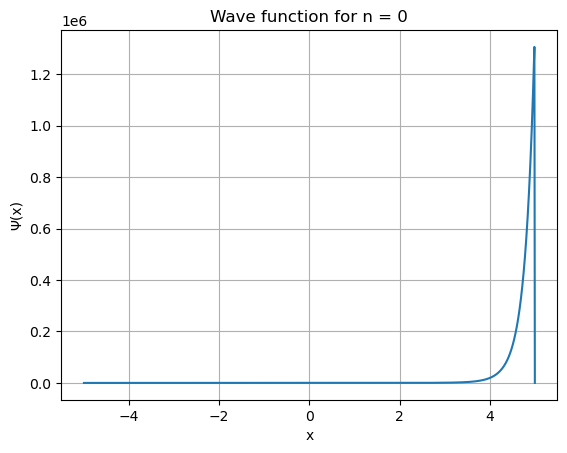

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def numerov_method(eigenvalue_n, x_max, h):
    # Initialize the parameters
    n = eigenvalue_n
    epsilon = n + 0.5
    a = 1.0

    # Create the x array
    x = np.arange(-x_max, x_max + h, h)

    # Initialize the wave function array
    psi = np.zeros_like(x)

    # Set initial conditions based on whether n is even or odd
    if n % 2 == 0:
        psi[len(x)//2] = a
        psi[len(x)//2 + 1] = a / 2
    else:
        psi[len(x)//2] = 0
        psi[len(x)//2 + 1] = a

    # Numerov method implementation
    for i in range(len(x) - 2):
        if i == len(x) // 2:
            continue
        g = h**2 * (2 * epsilon - x[i]**2)
        psi[i + 1] = (2 * psi[i] * (1 - 5/12 * g) - (1 + 1/12 * g) * psi[i - 1]) / (1 + 1/12 * g)

    return x, psi

# Example usage
n = 0  # Ground state
x_max = 5.0
h = 0.01

x, psi = numerov_method(n, x_max, h)

# Plot the result
plt.plot(x, psi)
plt.xlabel('x')
plt.ylabel('Ψ(x)')
plt.title(f'Wave function for n = {n}')
plt.grid(True)
plt.show()



C:\Users\sashw\AppData\Local\Temp\ipykernel_16724\2293669370.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  prefactor = (2**n * np.math.factorial(n) * np.sqrt(np.pi)) ** (-0.5)


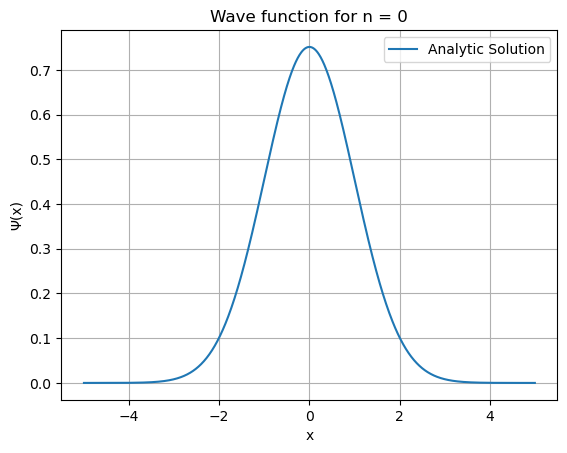

In [16]:
def hermite_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        Hn_minus_2 = 1
        Hn_minus_1 = 2 * x
        for i in range(2, n + 1):
            Hn = 2 * x * Hn_minus_1 - 2 * (i - 1) * Hn_minus_2
            Hn_minus_2, Hn_minus_1 = Hn_minus_1, Hn
        return Hn

def analytic_solution(n, x):
    Hn = np.array([hermite_polynomial(n, xi) for xi in x])
    prefactor = (2**n * np.math.factorial(n) * np.sqrt(np.pi)) ** (-0.5)
    return prefactor * Hn * np.exp(-x**2 / 2)

n = 0
x_max = 5.0
h = 0.01
x = np.arange(-x_max, x_max + h, h)
psi_analytic = analytic_solution(n, x)

plt.plot(x, psi_analytic, label='Analytic Solution')
plt.xlabel('x')
plt.ylabel('Ψ(x)')
plt.title(f'Wave function for n = {n}')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\sashw\AppData\Local\Temp\ipykernel_16724\269739905.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  prefactor = (2**n * np.math.factorial(n) * np.sqrt(np.pi)) ** (-0.5)


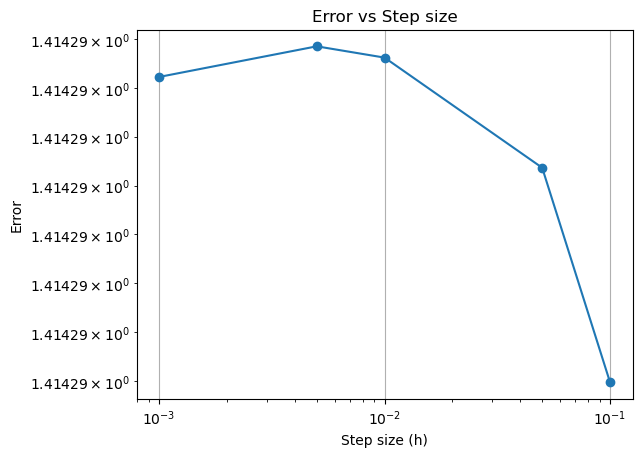

In [17]:
def hermite_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        Hn_minus_2 = 1
        Hn_minus_1 = 2 * x
        for i in range(2, n + 1):
            Hn = 2 * x * Hn_minus_1 - 2 * (i - 1) * Hn_minus_2
            Hn_minus_2, Hn_minus_1 = Hn_minus_1, Hn
        return Hn

def analytic_solution(n, x):
    Hn = np.array([hermite_polynomial(n, xi) for xi in x])
    prefactor = (2**n * np.math.factorial(n) * np.sqrt(np.pi)) ** (-0.5)
    return prefactor * Hn * np.exp(-x**2 / 2)

def numerov_method(n, x_max, h):
    x = np.arange(-x_max, x_max + h, h)
    N = len(x)
    psi = np.zeros(N)

    if n % 2 == 0:
        psi[N//2] = 1.0
        psi[N//2 + 1] = 0.5
    else:
        psi[N//2] = 0.0
        psi[N//2 + 1] = 1.0

    epsilon_n = n + 0.5

    for i in range(N//2 + 1, N - 1):
        g = 2 * (epsilon_n - 0.5 * x[i]**2)
        psi[i+1] = (2 * psi[i] * (1 - 5/12 * h**2 * (2 * epsilon_n - x[i-1]**2)) - psi[i-1] * (1 + h**2/12 * (2 * epsilon_n - x[i-2]**2))) / (1 + h**2/12 * g)

    psi /= np.sqrt(np.sum(psi**2) * h)

    return x, psi

n = 0
x_max = 5.0
h_values = [0.1, 0.05, 0.01, 0.005, 0.001]
errors = []

for h in h_values:
    x, psi_numerov = numerov_method(n, x_max, h)
    psi_analytic = analytic_solution(n, x)

    # Interpolate the analytic solution to match the numerical solution's x values
    psi_analytic_interp = np.interp(x, x, psi_analytic)

    # Calculate the error
    error = np.sqrt(np.sum((psi_numerov - psi_analytic_interp)**2) * h)
    errors.append(error)

# Plot the error as a function of step size
plt.loglog(h_values, errors, marker='o')
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.title('Error vs Step size')
plt.grid(True)
plt.show()


## 2. Neutrons bouncing under gravity

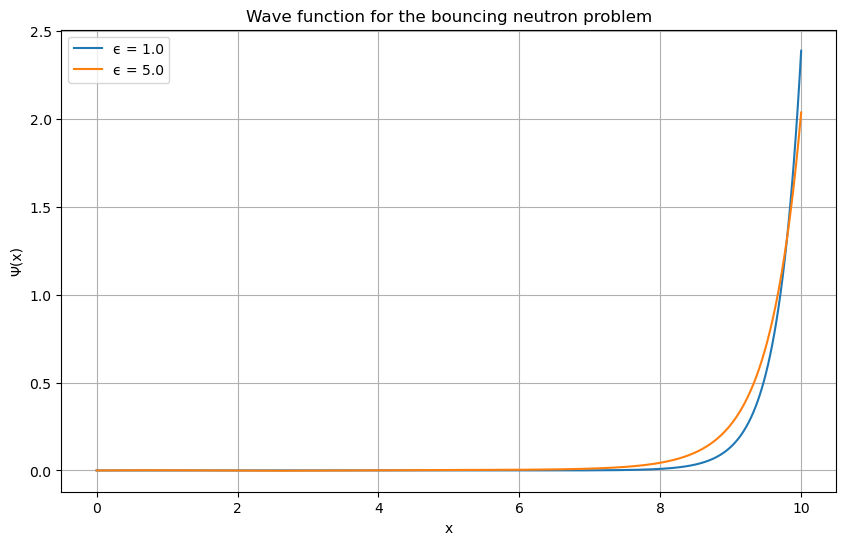

In [18]:
def numerov_method(epsilon, x_max, h):
    """
    Solve the dimensionless Schrödinger equation for the bouncing neutron problem
    using the Numerov method.

    Parameters:
    epsilon (float): Dimensionless energy
    x_max (float): Maximum value of x
    h (float): Step size

    Returns:
    x (numpy array): Array of x values
    psi (numpy array): Array of wave function values
    """
    # Initialize x array
    x = np.arange(0, x_max + h, h)
    N = len(x)

    # Initialize wave function array
    psi = np.zeros(N)

    # Set initial conditions
    psi[0] = 0.0
    psi[1] = 0.1

    # Numerov method
    for i in range(1, N - 1):
        g = epsilon - x[i]
        psi[i+1] = (2 * psi[i] * (1 - 5/12 * h**2 * (epsilon - x[i-1])) - psi[i-1] * (1 + h**2/12 * (epsilon - x[i-2]))) / (1 + h**2/12 * g)

    # Normalize the wave function
    psi /= np.sqrt(np.sum(psi**2) * h)

    return x, psi

# Parameters
x_max = 10.0
h = 0.01

# Values of epsilon
epsilon_values = [1.0, 5.0]

# Solve and plot for different values of epsilon
plt.figure(figsize=(10, 6))
for epsilon in epsilon_values:
    x, psi = numerov_method(epsilon, x_max, h)
    plt.plot(x, psi, label=f'ϵ = {epsilon}')

plt.xlabel('x')
plt.ylabel('Ψ(x)')
plt.title('Wave function for the bouncing neutron problem')
plt.legend()
plt.grid(True)
plt.show()


Eigenvalue 1: 2.328
Eigenvalue 2: 4.078
Eigenvalue 3: 5.510


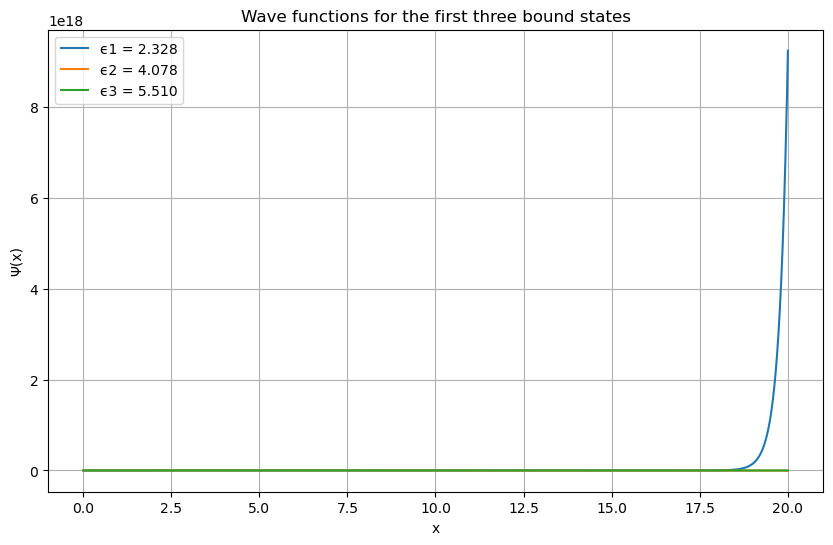

In [19]:
def numerov_method(epsilon, x_max, h):
    x = np.arange(0, x_max + h, h)
    N = len(x)
    psi = np.zeros(N)

    psi[0] = 0.0
    psi[1] = 0.1

    for i in range(1, N - 1):
        g = epsilon - x[i]
        psi[i+1] = (2 * psi[i] * (1 - 5/12 * h**2 * (epsilon - x[i-1])) - psi[i-1] * (1 + h**2/12 * (epsilon - x[i-2]))) / (1 + h**2/12 * g)

    return x, psi

def find_eigenvalues(num_eigenvalues, x_max, h, epsilon_tolerance):
    eigenvalues = []
    epsilon = 0.0

    for n in range(num_eigenvalues):
        epsilon_low = epsilon
        epsilon_high = epsilon_low + 1.0
        psi_sign_low = None

        while True:
            x, psi = numerov_method(epsilon_high, x_max, h)
            psi_sign_high = np.sign(psi[-1])

            if psi_sign_low is not None and psi_sign_low != psi_sign_high:
                break

            epsilon_low = epsilon_high
            psi_sign_low = psi_sign_high
            epsilon_high += 1.0

        while epsilon_high - epsilon_low > epsilon_tolerance:
            epsilon_mid = (epsilon_low + epsilon_high) / 2
            x, psi = numerov_method(epsilon_mid, x_max, h)
            psi_sign_mid = np.sign(psi[-1])

            if psi_sign_mid == psi_sign_low:
                epsilon_low = epsilon_mid
            else:
                epsilon_high = epsilon_mid

        eigenvalues.append((epsilon_low + epsilon_high) / 2)
        epsilon = epsilon_high

    return eigenvalues

# Parameters
x_max = 20.0
h = 0.01
epsilon_tolerance = 1e-3
num_eigenvalues = 3

# Find the first three eigenvalues
eigenvalues = find_eigenvalues(num_eigenvalues, x_max, h, epsilon_tolerance)

# Print the eigenvalues
for n, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {n+1}: {eigenvalue:.3f}")

# Plot the wave functions for the first three eigenvalues
plt.figure(figsize=(10, 6))
for n, eigenvalue in enumerate(eigenvalues):
    x, psi = numerov_method(eigenvalue, x_max, h)
    plt.plot(x, psi, label=f'ϵ{n+1} = {eigenvalue:.3f}')

plt.xlabel('x')
plt.ylabel('Ψ(x)')
plt.title('Wave functions for the first three bound states')
plt.legend()
plt.grid(True)
plt.show()
